In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from PIL import Image
import re
import os
import cv2
from skimage.feature import graycomatrix, graycoprops
import pandas as pd

In [2]:
import pandas as pd

def dataloader(path):
    # image_files = os.listdir(image_dir)
    # image_paths = [os.path.join(image_dir, filename) for filename in image_files]

    data = {}
    for filename in os.listdir(path):
        if re.search(r'dusty', filename):
            file_path = os.path.join(path, filename)
            data[file_path] = 1
        else:
            file_path = os.path.join(path, filename)    
            data[file_path] = 0

    return data

In [3]:
path = "D:\FYP\dataset"
dataset = dataloader(path)

# print(X[0])
# print(dataset)
Tr = []
for path,label in dataset.items():
    img = cv2.imread(path)
#     b, g, r = cv2.split(img)

# # Apply histogram equalization to each color channel
#     equalized_b = cv2.equalizeHist(b)
#     equalized_g = cv2.equalizeHist(g)
#     equalized_r = cv2.equalizeHist(r)

#     # Merge the equalized channels back into an RGB image
#     equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

#     # Create a high-pass filter kernel
#     kernel = np.array([[-1, -1, -1],
#                     [-1,  9, -1],
#                     [-1, -1, -1]], dtype=np.float32)

#     # Apply the high-pass filter to the equalized RGB image
#     high_pass_image = cv2.filter2D(equalized_image, -1, kernel)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue = img_hsv[:,:,0]

    glcm = graycomatrix(hue,distances=[1],angles=[0,np.pi/2])
    contrast = graycoprops(glcm, prop='contrast')
    homogeneity = graycoprops(glcm, prop='homogeneity')

    X_feature = np.array([contrast[0,0], contrast[0,1], homogeneity[0,0], homogeneity[0,1], label])
    Tr.append(X_feature)



In [4]:
Tr = np.array(Tr)

# np.savetxt('Features.csv', Tr, delimiter=',', fmt='%f')

# df = pd.DataFrame(Tr)

# excel_file_path = 'Features.xlsx'

# # Save the DataFrame as an Excel file
# df.to_excel(excel_file_path, index=False)

In [5]:
print(Tr)

[[2.81273286e+03 3.28547894e+03 2.34927244e-01 1.74213481e-01
  0.00000000e+00]
 [2.64549269e+03 3.32653038e+03 3.21030213e-01 2.34113176e-01
  0.00000000e+00]
 [3.34876652e+03 2.48251630e+03 1.68628605e-01 2.25556121e-01
  0.00000000e+00]
 ...
 [1.54467413e+03 1.30257997e+03 4.40316376e-01 5.31565995e-01
  1.00000000e+00]
 [2.24720695e+03 1.82013996e+03 3.97583545e-01 4.96274956e-01
  1.00000000e+00]
 [2.10612318e+03 1.54406893e+03 3.68079850e-01 4.88445402e-01
  1.00000000e+00]]


In [3]:
# Load the CSV file into a pandas DataFrame
csv_file = 'Features.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file)

# Convert the DataFrame to a NumPy array
data_array = df.to_numpy()
Tr = data_array

In [4]:
np.random.shuffle(Tr)
print(Tr)

[[ 27.97472   45.160052   0.840964   0.789547   0.      ]
 [ 45.349504  47.825508   0.790293   0.863291   0.      ]
 [ 12.13686   17.558789   0.963624   0.956876   1.      ]
 ...
 [ 49.885166  54.071073   0.759725   0.883013   0.      ]
 [ 36.907848  42.827151   0.893374   0.873632   0.      ]
 [162.637345  82.76974    0.819277   0.916187   1.      ]]


In [5]:
X = Tr[:,:4]
y = Tr[:,-1]
print(X.shape)

(783, 4)


In [11]:
def feature_vector(image):

    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue = img_hsv[:,:,0]
    # cv2.imshow("window_name", hue)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    glcm = graycomatrix(hue,distances=[1],angles=[0,np.pi/2])
    contrast = graycoprops(glcm, prop='contrast')
    homogeneity = graycoprops(glcm, prop='homogeneity')

    X_feature = np.array([contrast[0,0], contrast[0,1], homogeneity[0,0], homogeneity[0,1]])

    return X_feature

In [8]:
def equlized_fv(image):
    b, g, r = cv2.split(image)

    equalized_b = cv2.equalizeHist(b)
    equalized_g = cv2.equalizeHist(g)
    equalized_r = cv2.equalizeHist(r)

    # Merge the equalized channels back into an RGB image
    equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

    # Create a high-pass filter kernel
    kernel = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]], dtype=np.float32)

    # Apply the high-pass filter to the equalized RGB image
    high_pass_image = cv2.filter2D(equalized_image, -1, kernel)
    img_hsv = cv2.cvtColor(high_pass_image, cv2.COLOR_BGR2HSV)
    hue = img_hsv[:,:,0]
    # cv2.imshow("window_name", hue)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    glcm = graycomatrix(hue,distances=[1],angles=[0,np.pi/2])
    contrast = graycoprops(glcm, prop='contrast')
    homogeneity = graycoprops(glcm, prop='homogeneity')

    X_feature = np.array([contrast[0,0], contrast[0,1], homogeneity[0,0], homogeneity[0,1]])

    return X_feature

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build a neural network model
model = keras.Sequential([
    keras.layers.Dense(10, input_dim=4, activation='relu'),  # Input layer with 4 features
    keras.layers.Dense(20, activation='relu'),  # First hidden layer
    keras.layers.Dense(20, activation='relu'),  # Second hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/50
55/55 [==============================] - 1s 2ms/step - loss: 2.2925 - accuracy: 0.5401
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6150
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6460
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6296
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6423
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.6588
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6259
Epoch 8/50
55/55 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.6715
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6533
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6606
Epoch 11/50
55/55 [

In [13]:
import matplotlib.pyplot as plt



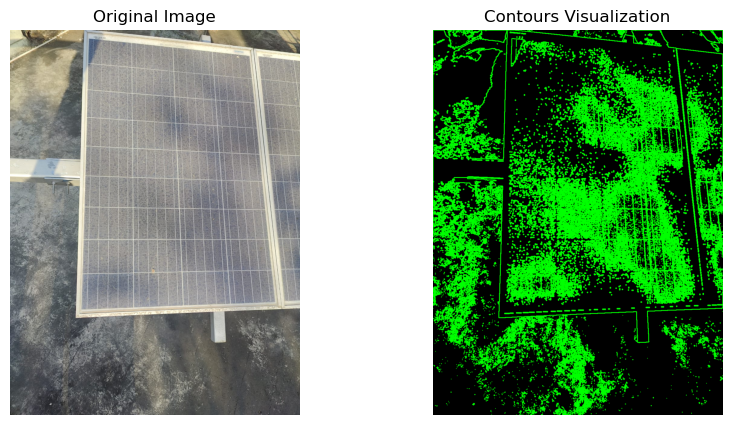

1/1 [==============================] - 0s 18ms/step
The probability of panel being dusty is 0.9982261657714844%


In [29]:
image = cv2.imread("D:\FYP\solarpanel.jpg")
cv2.imshow("window_name", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

x = feature_vector(image)
x = x.reshape(1, -1)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contour_image = np.zeros_like(image)

# Draw contours on the blank canvas
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Visualization')
plt.axis('off')
plt.show()

plt.show()

predictions = model.predict(x)
print(f"The probability of panel being dusty is {predictions[0][0]}%")


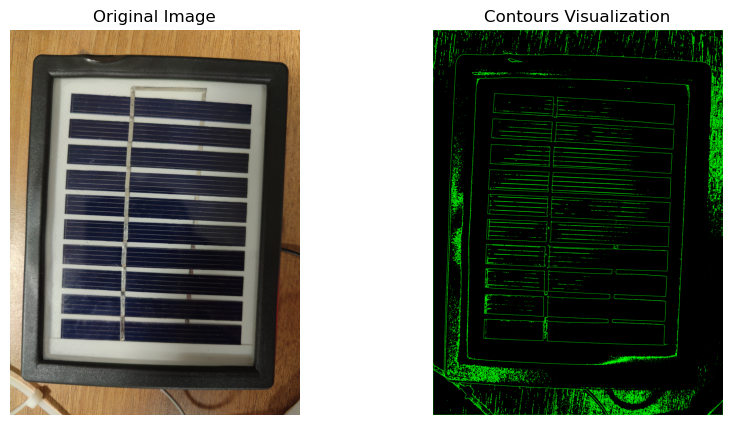

1/1 [==============================] - 0s 23ms/step
The probability of panel being dusty is 0.32354140281677246%


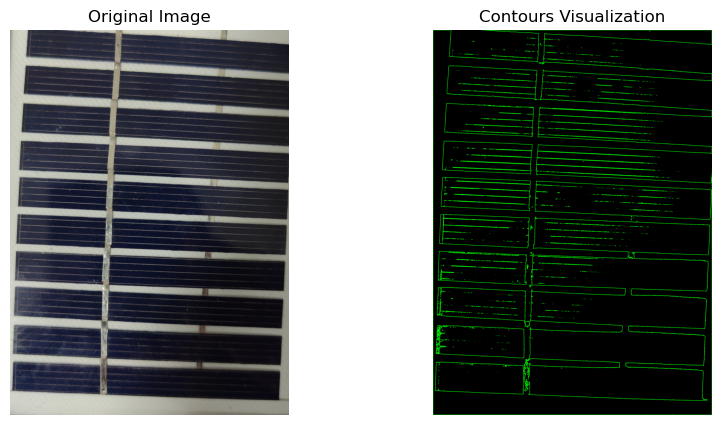

1/1 [==============================] - 0s 16ms/step
The probability of panel being dusty is 0.024279972538352013%


In [17]:
image1 = cv2.imread("D:\FYP\chotu.jpg")
# cv2.imshow("window_name", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
image2 = cv2.imread("D:\FYP\croppedchotu.jpg")
def prediction(image):
    x = feature_vector(image)
    x = x.reshape(1, -1)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    threshold, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contour_image = np.zeros_like(image)

    # Draw contours on the blank canvas
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Contours Visualization')
    plt.axis('off')
    plt.show()

    plt.show()

    predictions = model.predict(x)
    print(f"The probability of panel being dusty is {predictions[0][0]}%")


prediction(image1)
prediction(image2)

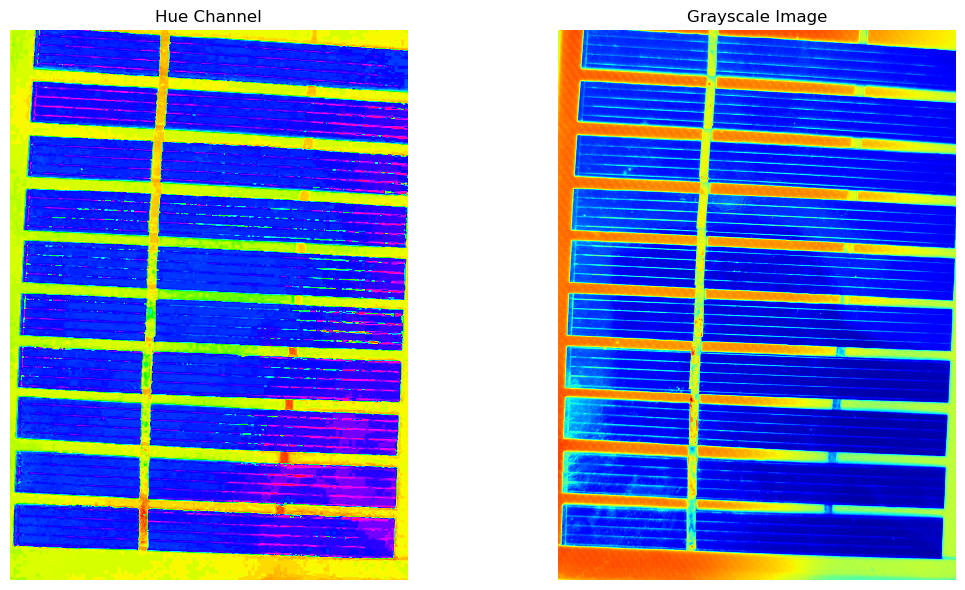

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
rgb_image = cv2.imread('D:\FYP\croppedchotu.jpg')

hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

# Extract the Hue channel from the HSV image
hue_channel = hsv_image[:,:,0]

# Convert RGB image to grayscale
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

# Plot the images using Matplotlib
plt.figure(figsize=(12, 6))

# Plot the Hue channel
plt.subplot(1, 2, 1)
plt.imshow(hue_channel, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Plot the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='jet')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

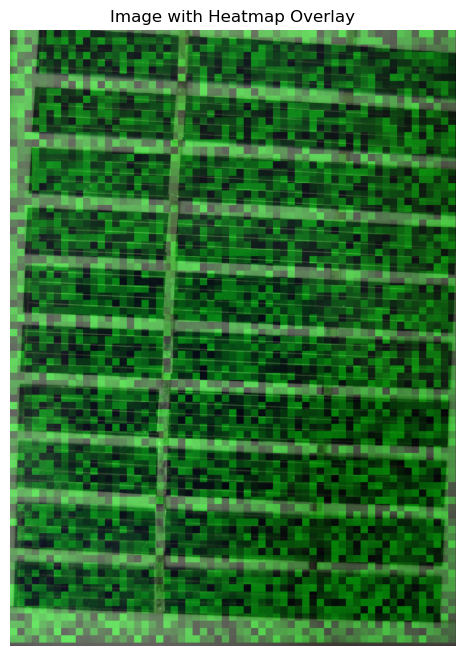

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('D:\FYP\croppedchotu.jpg')

# Define block size and stride
block_size = (32, 32)  # Example block size (height, width)
stride = (32, 32)  # Example stride (vertical_stride, horizontal_stride)

# Example: Generate random values for each block (replace with your own values)
num_blocks_y = image.shape[0] // block_size[0]
num_blocks_x = image.shape[1] // block_size[1]
block_values = np.random.rand(num_blocks_y, num_blocks_x)

# Create heatmap overlay
heatmap = np.zeros_like(image, dtype=np.uint8)
for y in range(num_blocks_y):
    for x in range(num_blocks_x):
        value = block_values[y, x]
        color = (0, int(value * 255), 0)  # Green color scaled based on value
        heatmap[y * block_size[0]:(y + 1) * block_size[0], x * block_size[1]:(x + 1) * block_size[1]] = color

# Overlay heatmap on original image
alpha = 0.5  # Adjust transparency of heatmap overlay
overlay = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)

# Plot the images
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title('Image with Heatmap Overlay')
plt.axis('off')
plt.show()



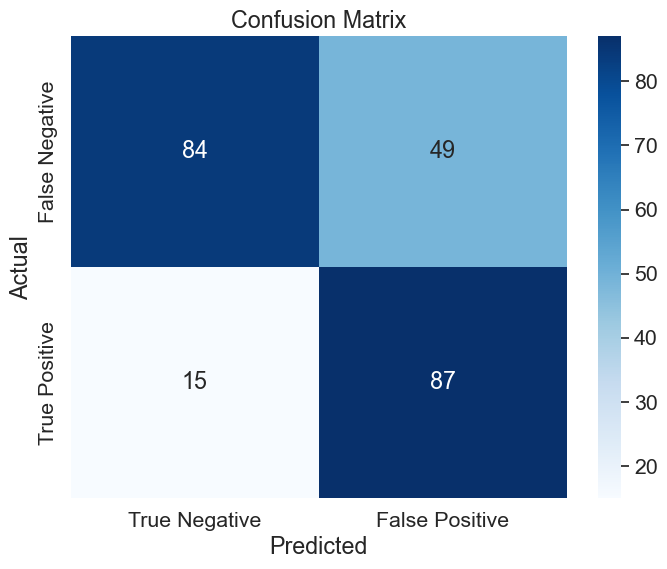

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have the true labels and predicted labels
# y_true = true_labels  # Replace with your true labels (ground truth)
# y_pred = predicted_labels  # Replace with your predicted labels

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(confusion)

# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix")
# plt.show()


# Normalize the confusion matrix if needed
# cm = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust font size
sns.heatmap(confusion, annot=True, cmap='Blues', 
            xticklabels=['True Negative', 'False Positive'],
            yticklabels=['False Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# # Assuming you have the true labels and predicted labels
# y_true = true_labels  # Replace with your true labels (ground truth)
# y_pred = predicted_labels  # Replace with your predicted labels

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/25
9/9 [==============================] - 0s 11ms/step - loss: 0.4767 - accuracy: 0.7810 - val_loss: 0.4980 - val_accuracy: 0.7532
Epoch 2/25
9/9 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.7810 - val_loss: 0.4950 - val_accuracy: 0.7660
Epoch 3/25
9/9 [==============================] - 0s 5ms/step - loss: 0.4789 - accuracy: 0.7755 - val_loss: 0.4974 - val_accuracy: 0.7532
Epoch 4/25
9/9 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.7792 - val_loss: 0.4950 - val_accuracy: 0.7660
Epoch 5/25
9/9 [==============================] - 0s 7ms/step - loss: 0.4776 - accuracy: 0.7719 - val_loss: 0.4936 - val_accuracy: 0.7489
Epoch 6/25
9/9 [==============================] - 0s 7ms/step - loss: 0.4760 - accuracy: 0.7755 - val_loss: 0.4957 - val_accuracy: 0.7574
Epoch 7/25
9/9 [==============================] - 0s 7ms/step - loss: 0.4774 - accuracy: 0.7755 - val_loss: 0.4952 - val_accuracy: 0.7617
Epoch 8/25
9/9 [=================

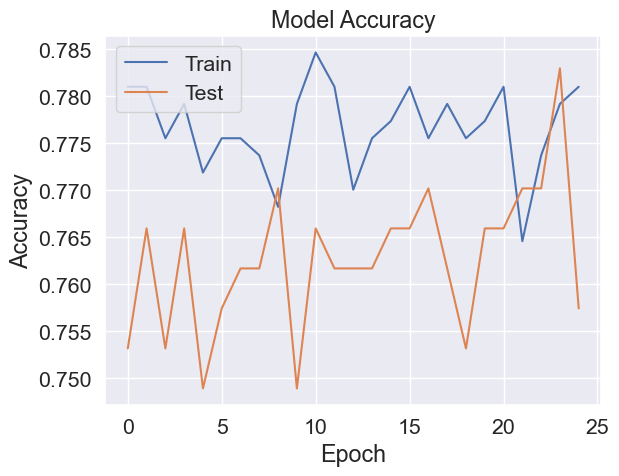

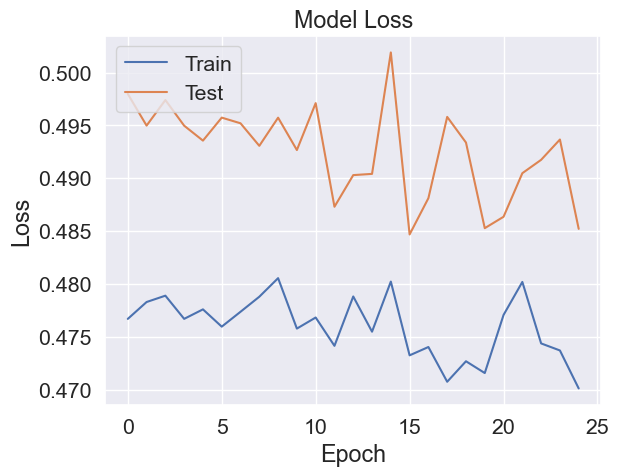

In [35]:
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

# Plot the accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('accuracy2.png')
plt.show()

# Plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('loss2.png')
plt.show()